In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import string

In [28]:
# Creating class labels, based on filter
def create_labels(ids, df):
    
    main = df[['source_id']].to_numpy()
    
    labels = []
    for id_num in main:
        if(id_num in ids):
            labels.append(1)
        else:
            labels.append(0)

    df['is_cluster'] = labels
    return df
    


In [29]:
def plot_prediction(df, df_model, df_cluster, df_name):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(string.capwords(df_name))
    ax1.title.set_text('True Labels')
    ax1.scatter(df[['bp_rp']],df[['phot_g_mean_mag']], c = 'grey', s = 10, alpha = 0.5)
    ax1.scatter(df_cluster[['bp_rp']],df_cluster[['phot_g_mean_mag']], c = df_cluster[['teff_gspphot']].to_numpy(), s = 10)
    ax1.set_xlabel('BP-RP colour (mag)')
    ax1.set_ylabel('Apparent Magnitude (mag)') 
    ax1.invert_yaxis()

    cluster_model = StandardScaler().fit_transform(df_model)
    clustering = DBSCAN(eps=0.079, min_samples=200, n_jobs = 10).fit(cluster_model)
    df_prediction = df.iloc[np.where(clustering.labels_ == np.unique(clustering.labels_)[-1])] # gets last cluster number
    cluster_prediction = np.where(clustering.labels_ == np.unique(clustering.labels_)[-1], 1, 0)

    ax2.title.set_text('DBSCAN prediction')
    ax2.scatter(df[['bp_rp']],df[['phot_g_mean_mag']], c = 'grey', s = 10, alpha = 0.5)
    ax2.scatter(df_prediction[['bp_rp']],df_prediction[['phot_g_mean_mag']], c = df_prediction[['teff_gspphot']].to_numpy(), s = 10)
    ax2.set_xlabel('BP-RP colour (mag)')
    ax2.invert_yaxis()

    
    print(f1_score(df[['is_cluster']], cluster_prediction))
    print(precision_score(df[['is_cluster']], cluster_prediction))
    print(recall_score(df[['is_cluster']], cluster_prediction))
    print(confusion_matrix(df[['is_cluster']], cluster_prediction))

In [30]:
def cluster_analysis(df_name):
    df = pd.read_csv(df_name + '-result.csv')
    
    print(df.info())
    df_model = df[['pmra','pmdec','parallax']]
    df_ids = pd.read_csv(df_name + '_ids.csv').to_numpy()
    
    #use ids to create column which loads the true labels
    df = create_labels(df_ids,df)
    
    #create seperate data frame with the true labels
    df_cluster = df.iloc[np.where(df[['is_cluster']] == 1)[0]]
    

    plot_prediction(df, df_model, df_cluster, df_name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15118 entries, 0 to 15117
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        15118 non-null  int64  
 1   ra               15118 non-null  float64
 2   dec              15118 non-null  float64
 3   pmra             15118 non-null  float64
 4   pmdec            15118 non-null  float64
 5   parallax         15118 non-null  float64
 6   phot_g_mean_mag  15118 non-null  float64
 7   bp_rp            15048 non-null  float64
 8   teff_gspphot     13662 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB
None
0.8929266709928617
0.8359659781287971
0.958217270194986
[[14265   135]
 [   30   688]]


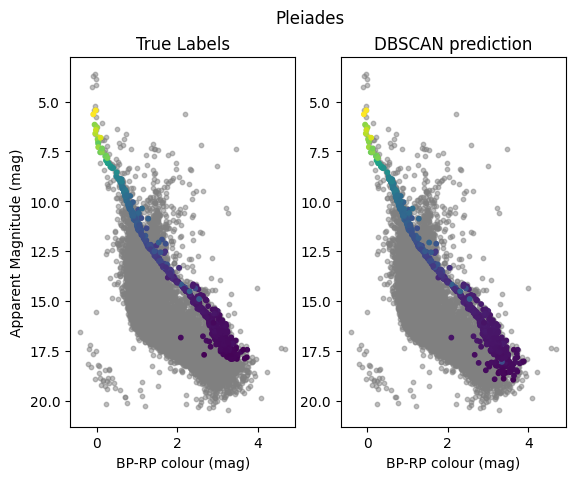

In [31]:
cluster_analysis('pleiades')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        13152 non-null  int64  
 1   ra               13152 non-null  float64
 2   dec              13152 non-null  float64
 3   pmra             13152 non-null  float64
 4   pmdec            13152 non-null  float64
 5   parallax         13152 non-null  float64
 6   phot_g_mean_mag  13149 non-null  float64
 7   bp_rp            13079 non-null  float64
 8   teff_gspphot     11494 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 924.9 KB
None
0.6202463845741831
0.4495341614906832
1.0
[[11864   709]
 [    0   579]]


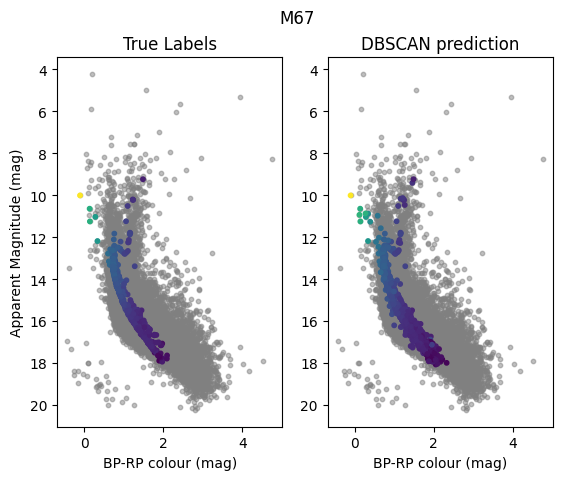

In [6]:
cluster_analysis('m67')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99030 entries, 0 to 99029
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        99030 non-null  int64  
 1   ra               99030 non-null  float64
 2   dec              99030 non-null  float64
 3   pmra             99030 non-null  float64
 4   pmdec            99030 non-null  float64
 5   parallax         99030 non-null  float64
 6   phot_g_mean_mag  98988 non-null  float64
 7   bp_rp            96345 non-null  float64
 8   teff_gspphot     75265 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 6.8 MB
None
0.7450980392156863
0.6167718665464382
0.9408528198074277
[[97878   425]
 [   43   684]]


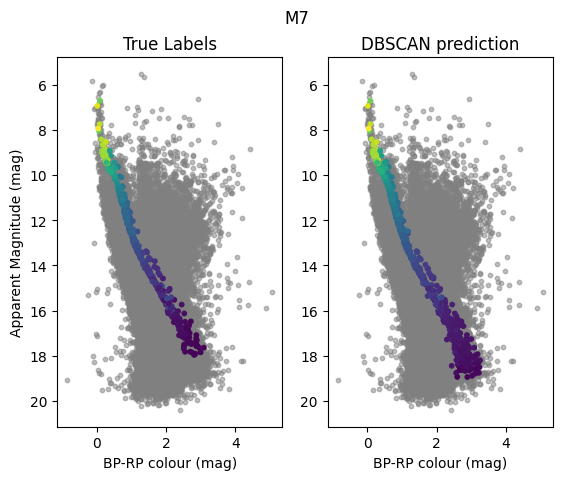

In [7]:
cluster_analysis('m7')

In [8]:
df_6645 = pd.read_csv('NGC_6645-result.csv')
df_ids_6645 = pd.read_csv("NGC_6645_ids.csv").to_numpy()
df_model_6645 = df_6645[['pmra','pmdec','parallax']]

print(df_6645.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92709 entries, 0 to 92708
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_id        92709 non-null  int64  
 1   ra               92709 non-null  float64
 2   dec              92709 non-null  float64
 3   pmra             92709 non-null  float64
 4   pmdec            92709 non-null  float64
 5   parallax         92709 non-null  float64
 6   phot_g_mean_mag  92703 non-null  float64
 7   bp_rp            91774 non-null  float64
 8   teff_gspphot     79867 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 6.4 MB
None


In [9]:
df_171 = pd.read_csv('NGC_6645-result.csv')
df_ids_171 = pd.read_csv("Ruprecht_171_ids.csv").to_numpy()


In [10]:
df_label_6645 = create_labels(df_ids_6645, df_6645)

df_cluster_6645 = df_6645.iloc[np.where(df_label_6645[['is_cluster']] == 1)[0]]

In [11]:
df_label_171 = create_labels(df_ids_171, df_171)

df_cluster_171 = df_171.iloc[np.where(df_label_171[['is_cluster']] == 1)[0]]

In [12]:
cluster_model = pd.DataFrame(StandardScaler().fit_transform(df_model_6645[['pmra','pmdec','parallax']]))

clustering_test = DBSCAN(eps = 0.035, min_samples = 200, n_jobs = 10).fit(cluster_model) 

print(np.unique(clustering_test.labels_,return_counts= True))

(array([-1,  0,  1]), array([91806,   532,   371]))


0.550063371356147
0.40789473684210525
0.8443579766536965


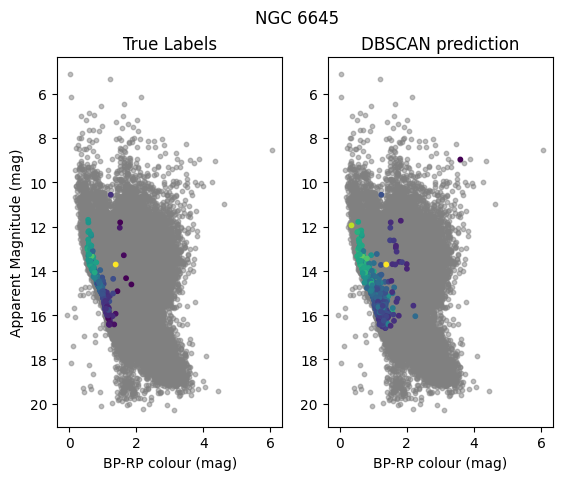

In [22]:
cluster_prediction_6645 = np.where(clustering_test.labels_ == 0, 1, 0)
df_prediction_6645 = df_6645.iloc[np.where(clustering_test.labels_ == 0)]

print(f1_score(df_label_6645['is_cluster'], cluster_prediction_6645))
print(precision_score(df_label_6645[['is_cluster']], cluster_prediction_6645))
print(recall_score(df_label_6645[['is_cluster']], cluster_prediction_6645))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('NGC 6645')
    
ax1.title.set_text('True Labels')
ax1.scatter(df_6645[['bp_rp']],df_6645[['phot_g_mean_mag']], c = 'grey', s = 10, alpha = 0.5)
ax1.scatter(df_cluster_6645[['bp_rp']],df_cluster_6645[['phot_g_mean_mag']], c = df_cluster_6645[['teff_gspphot']].to_numpy(), s = 10)
ax1.set_xlabel('BP-RP colour (mag)')
ax1.set_ylabel('Apparent Magnitude (mag)') 
ax1.invert_yaxis()



ax2.title.set_text('DBSCAN prediction')
ax2.set_xlabel('BP-RP colour (mag)')
ax2.scatter(df_6645[['bp_rp']],df_6645[['phot_g_mean_mag']], c = 'grey', s = 10, alpha = 0.5)
ax2.scatter(df_prediction_6645[['bp_rp']],df_prediction_6645[['phot_g_mean_mag']], c = df_prediction_6645[['teff_gspphot']].to_numpy(), s = 10)
ax2.invert_yaxis()
plt.show()

0.7670011148272018
0.9272237196765498
0.6539923954372624


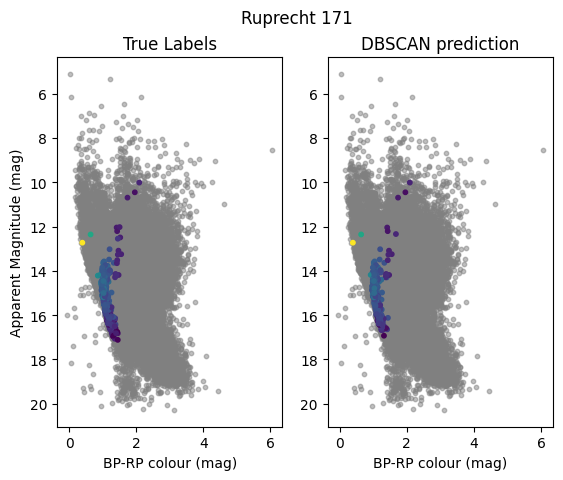

In [23]:
cluster_prediction_171 = np.where(clustering_test.labels_ == 1, 1, 0)
df_prediction_171 = df_171.iloc[np.where(clustering_test.labels_ == 1)]


    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Ruprecht 171')
    
ax1.title.set_text('True Labels')
print(f1_score(df_label_171['is_cluster'], cluster_prediction_171))
print(precision_score(df_label_171[['is_cluster']], cluster_prediction_171))
print(recall_score(df_label_171[['is_cluster']], cluster_prediction_171))

ax1.scatter(df_171[['bp_rp']],df_171[['phot_g_mean_mag']], c = 'grey', s = 10, alpha = 0.5)
ax1.scatter(df_cluster_171[['bp_rp']],df_cluster_171[['phot_g_mean_mag']], c = df_cluster_171[['teff_gspphot']].to_numpy(), s = 10)
ax1.set_xlabel('BP-RP colour (mag)')
ax1.set_ylabel('Apparent Magnitude (mag)') 
ax1.invert_yaxis()



ax2.title.set_text('DBSCAN prediction')
ax2.set_xlabel('BP-RP colour (mag)')
ax2.scatter(df_171[['bp_rp']],df_171[['phot_g_mean_mag']], c = 'grey', s = 10, alpha = 0.5)
ax2.scatter(df_prediction_171[['bp_rp']],df_prediction_171[['phot_g_mean_mag']], c = df_prediction_171[['teff_gspphot']].to_numpy(), s = 10)
ax2.invert_yaxis()
plt.show()